# Evolution of Reggae into Dub into Dubstep

## Corpus

We are going to look at a set of three playlists. They are called:

'<b>Old School Reggae Roots 70s/80s</b>' (300 tracks)<br>
'<b>Heavy roots dub reggae</b>' (317 tracks)<br>
'<b>DEEP MEDi MUSIK & Tempa Records .. deep</b>' (617 tracks)

These are all playlists of styles of music that are somhow connected. The theory is that dub (2nd playlist) evolved from reggae (1st playlist), and dupstep (3rd playlist) evolved from dub. Therefore these three playlist represent the 'evolution of reggae into dubstep'. 

Spotify has an API that will allow us to gather their analysis on all of their tracks. We will use this to create a dataset of features of all the tracks in our corpus

Note: We are not talking about the 'brostep' genre, commonly referred to as dubstep. brostep artists include Skrillex and Datsik.

## Preliminary Hypotheses

We want to see if we can somehow find a 'shift' in these playlists. That is, the distribution of Spotify's features of these three playlists follow some path. 

We can see for example, that reggae is traditionally played on acoustic or amplified musical intruments, dub songs are often a re-mix of the individual tracks of a reggae song, using a lot of (analogue) effects, and dubstep is usually entirely electronically/digitally produced. Because of this, we expect to see some decrease in the 'acousticness' feature in these playlists.

We can also argue that the instrumentalness will increase. Reggae usually has vocals, where dubstep typically doesn't.

TODO: MORE FEATURES

## Setting up
First we need get our corpus from the Spotify API. In a file called `helpers.py`, we've defined some helper functions to load all this data in batches, to keep the amount of code in this notebook to a minimum. 

First we need to do some imports, then we will load the track features of the  playlists and save them in pandas dataframes.

In [1]:
### imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import helpers

In [7]:
# Playlist 1
p1_name, p1_tracks = helpers.collect_tracks_query("old school reggae roots", "playlist")
df1 = helpers.get_tracklist_features(p1_tracks)
print(f"Playlist analysis: {p1_name}, with {len(p1_tracks)} tracks")

# Playlist 1
p2_name, p2_tracks = helpers.collect_tracks_query("heavy dub roots reggae", "playlist")
df2 = helpers.get_tracklist_features(p2_tracks)
print(f"Playlist analysis: {p2_name}, with {len(p2_tracks)} tracks")

# Playlist 1
p3_name, p3_tracks = helpers.collect_tracks_query("deep medi musik", "playlist")
df3 = helpers.get_tracklist_features(p3_tracks)
print(f"Playlist analysis: {p3_name}, with {len(p3_tracks)} tracks")

Playlist analysis: Old School Reggae Roots 70s/80s, with 372 tracks
Playlist analysis: Heavy Dub Roots Reggae, with 835 tracks
Playlist analysis: DEEP MEDi MUSIK & Tempa Records .. deep, with 617 tracks


## Visualization

We want to have a good idea of what our corpus looks like. We will generate some histograms of the three playlists for each feature. We will also plot the means for each playlist. This should give us not only an idea of how the features playlists are distributed, but also how the different playlists relate.

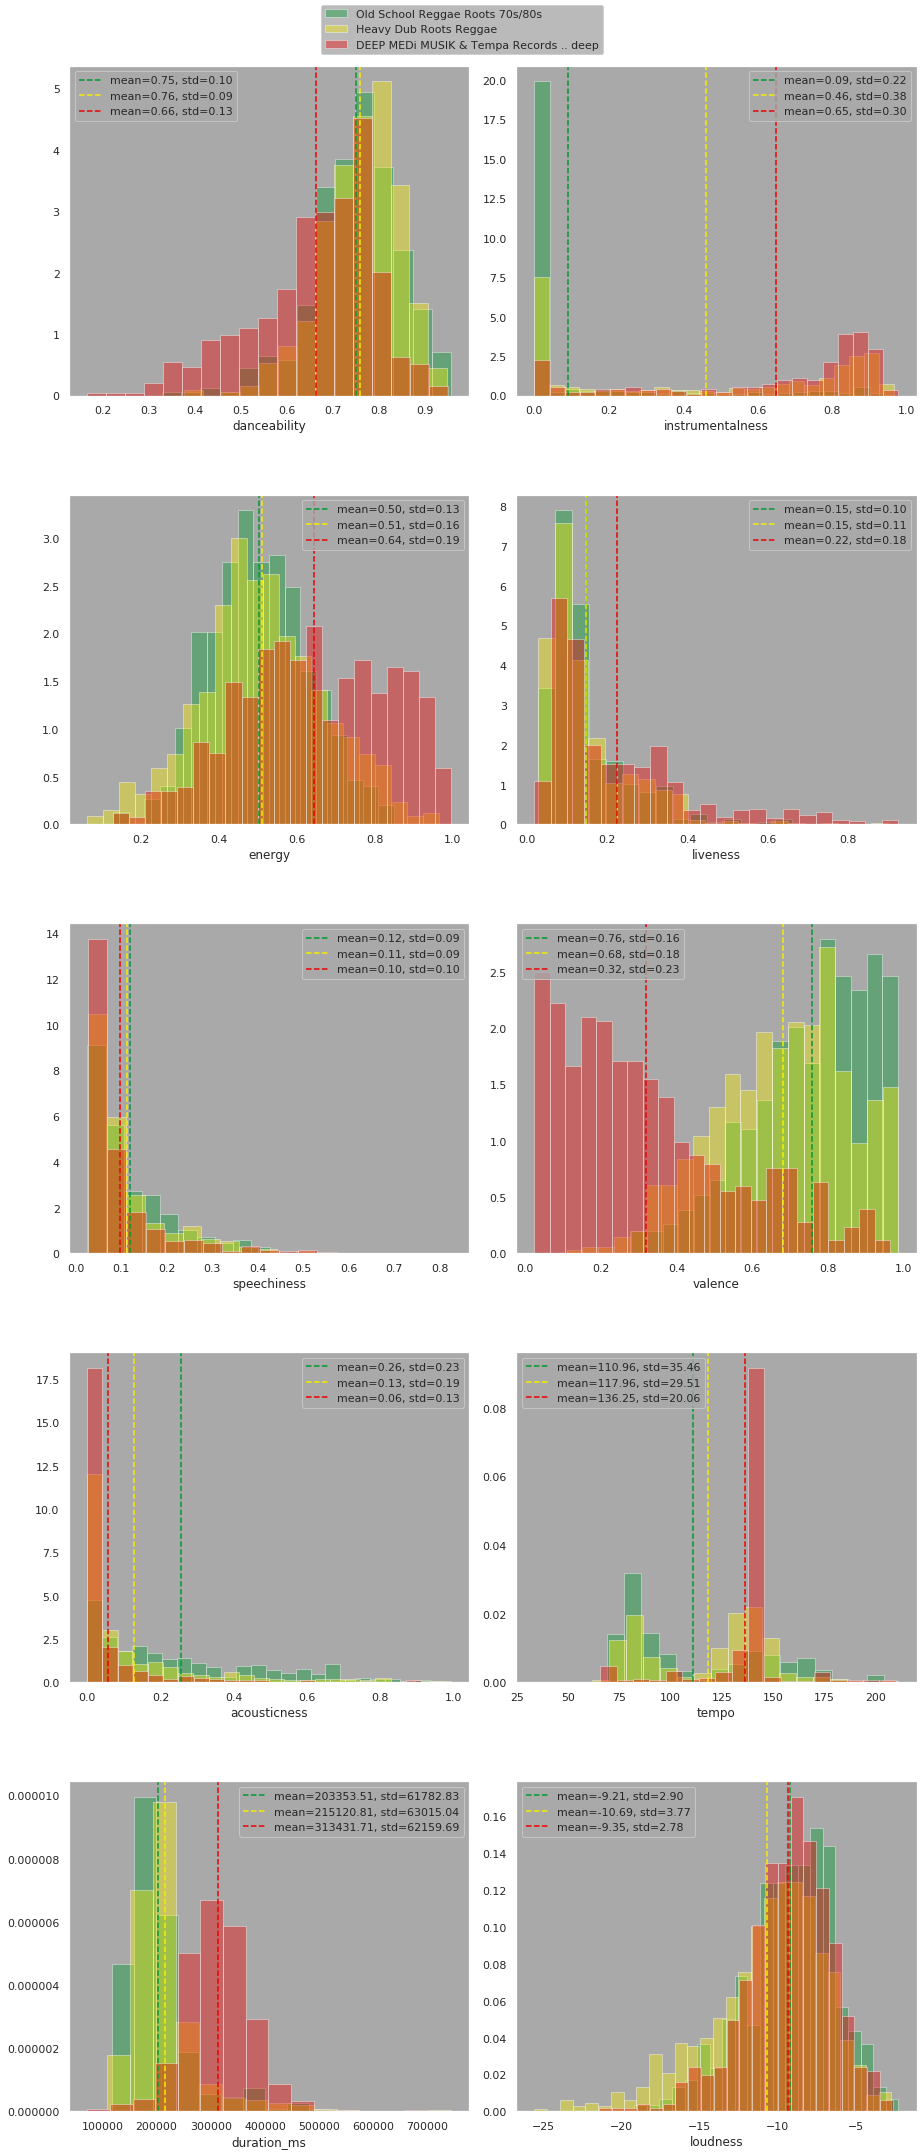

In [3]:
### Vizualization
# Now that we've loaded all the features in our playlist, we want to visually analyze the 
# results. We define a list with all the features we want to look at, including the ranges
# the values will be in.
###

interesting_features = [
    ['danceability', 0, 1],
    ['energy', 0, 1],
    ['speechiness',0, 1],
    ['acousticness', 0, 1],
    ['duration_ms', 0, 1000000],
    ['instrumentalness', 0, 1],
    ['liveness', 0, 1],
    ['valence', 0, 1],
    ['tempo', 20, 220],
    ['loudness', -20, 0]
]

### Plots
# we will generate 10 histograms, one for each interesting feature, each histogram holds
# the distributions of that feature of each playlist, seperated by different colors.
sns.set_style("white")
sns.set(rc={
    'figure.figsize':(13,30),
    'axes.facecolor':'darkgrey',
    'figure.facecolor':'white',
    'axes.grid' : False
})
fig, axs = plt.subplots(5, 2)

for i in range(5):
    for j in range(2):
        ft, minv, maxv = interesting_features[i + (5*j)]
        # define the bin width, so the bins will be the same size for the 
        # different playlists
        binwidth = abs(maxv - minv)/25
        
        # calculate amount of bins based on binwidth defined earlier
        # the colors of eacht plot are based on the flag of ethiopia (rastafari flag)
        sns.distplot(
            df1[ft], label=p1_name, ax=axs[i, j], color="#00992f", kde=False, norm_hist=True, 
            bins=int(abs(df1[ft].max() - df1[ft].min())/binwidth)
            
        )
        sns.distplot(
            df2[ft], label=p2_name, ax=axs[i, j], color="#f7ee00", kde=False, norm_hist=True, 
            bins=int(abs(df2[ft].max() - df2[ft].min())/binwidth)
        )
        sns.distplot(
            df3[ft], label=p3_name, ax=axs[i, j], color="#eb0000", kde=False, norm_hist=True, 
            bins=int(abs(df3[ft].max() - df3[ft].min())/binwidth)
        )
        
        # represent the means of the data as vertical dashed lines
        l1 = axs[i, j].axvline(df1[ft].mean(), ls='--', color="#00992f")
        l2 = axs[i, j].axvline(df2[ft].mean(), ls='--', color="#f7ee00")
        l3 = axs[i, j].axvline(df3[ft].mean(), ls='--', color="#eb0000")
        
        # legend for each subplot displaying the means and stds
        axs[i, j].legend((l1, l2, l3), (
            f"mean={df1[ft].mean():.2f}, std={df1[ft].std():.2f}",
            f"mean={df2[ft].mean():.2f}, std={df2[ft].std():.2f}",
            f"mean={df3[ft].mean():.2f}, std={df3[ft].std():.2f}"
        ))

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.subplots_adjust(hspace = 0.3, top=0.97)

From visual inspection, we can already draw some preliminary conclusions. We can see that our hypotheses had some meaning. 

The acousticness does seem to decrease, with the mean going from 0.25 $\rightarrow$ 0.13 $\rightarrow$ 0.06. 

The intrumentalness also has a remarkable path. Reggae has a very low score (mean of 0.09), meaning it has a lot of vocals. Dub is significantly more instrumental with a mean score of 0.46, Dubstep is even more intrumental with a mean score of 0.65.

TODO: MORE FEATURES

### Statistical Significance

To verify our conclusions we have to look at some degree of statistical significance. For now we will look at how 'far', that is, how many standard deviations the mean of the scores for one playlist lies from another. We check all of these at once and store them in a table.

Here, negative values mean 'less' and positive values mean 'more' (negative value can mean: reggae is less danceable than dub).

In [4]:
### Significance

# take the means and standard deviations, and make those values the columns so we can 
# perform vector operations on them
agg1 = df1.agg(["mean", "std"]).T
agg2 = df2.agg(["mean", "std"]).T
agg3 = df3.agg(["mean", "std"]).T

# check how many standard deviations two genres lie from eachother
significance = pd.DataFrame({
    "reggae - dub":     (agg1["mean"] - agg2["mean"]) / agg1["std"],
    "reggae - dubstep": (agg1["mean"] - agg3["mean"]) / agg1["std"],
    "dub - reggae":     (agg2["mean"] - agg1["mean"]) / agg2["std"],
    "dub - dubstep":    (agg2["mean"] - agg3["mean"]) / agg2["std"],
    "dubstep - reggae": (agg3["mean"] - agg1["mean"]) / agg3["std"],
    "dubstep - dub":    (agg3["mean"] - agg2["mean"]) / agg3["std"]
})

significance

,reggae - dub,reggae - dubstep,dub - reggae,dub - dubstep,dubstep - reggae,dubstep - dub
danceability,-0.090797,0.913671,0.102349,1.132267,-0.664071,-0.730064
energy,-0.069390,-1.116147,0.055030,-0.830140,0.744178,0.697913
key,-0.095274,-0.049701,0.096215,0.046024,0.048168,-0.044169
loudness,0.511721,0.048411,-0.393762,-0.356511,-0.050444,0.482762
mode,0.525183,0.484942,-0.437557,-0.033527,-0.405972,0.033688
speechiness,0.072462,0.246417,-0.070327,0.168830,-0.219575,-0.155006
acousticness,0.559108,0.872465,-0.676478,0.379138,-1.550599,-0.556918
instrumentalness,-1.660899,-2.504570,0.983388,-0.499522,1.849048,0.622856
liveness,-0.016346,-0.788901,0.015408,-0.728227,0.443878,0.434680
valence,0.491318,2.808357,-0.434023,2.046837,-1.910941,-1.576625


Here we can see our preliminary conclusions were infact somewhat meaningful.

Dub is somewhat less acoustic than reggae (value of -0.61, meaning 0.61 standard deviations below the mean), and dubstep is somewhat less acoustic than dub (value of -0.56).

Reggae is a lot less instrumental than dub (value of -1.70), and dub is a somewhat less intrumental than dubstep (value of -0.50).

TODO: MORE FEATURES

### Clustering

We want some way to actually see how these playlists are represented by the track features. If we see the feature vectors as points in 7-dimensional space, we can create a scatterplot showing all tracks. Of course we can't see 7 dimensions, so we need to perform some dimensionality redution. There is an array of methods to use. Based on some trial and error, the t-SNE method was chosen. (See clustering_viz.ipynb for an example of all the methods).

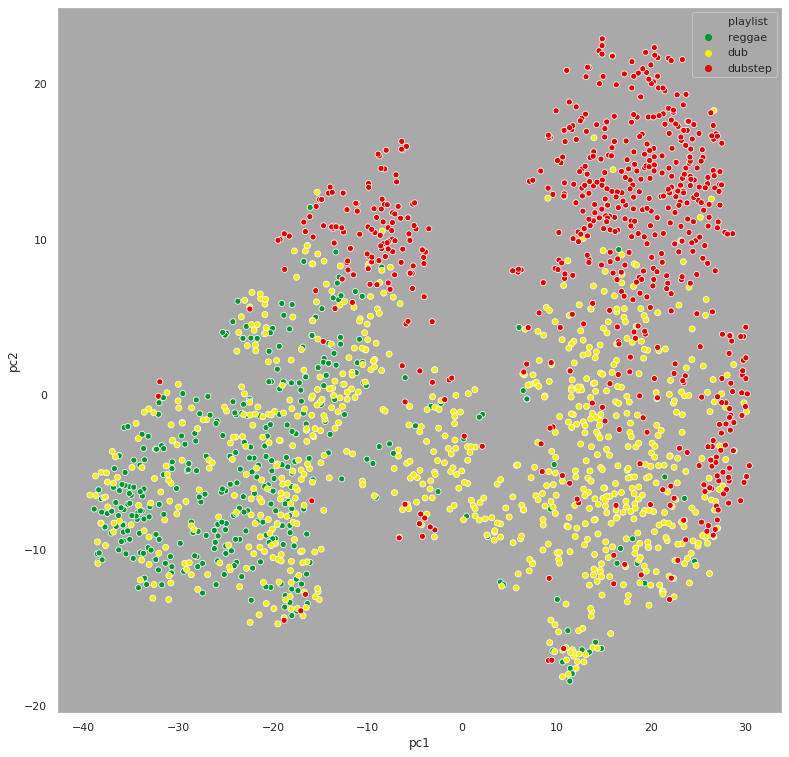

In [5]:
from sklearn.manifold import *

features = [
    "danceability",
    "energy",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence"
]

df1["playlist"] = "reggae"
df2["playlist"] = "dub"
df3["playlist"] = "dubstep"
complete_df = pd.concat([df1, df2, df3])

tsne = TSNE(n_components=2, perplexity=80)
principal_components = tsne.fit_transform(complete_df[features].values)
principal_df = pd.DataFrame(data=principal_components, columns = ['pc1', 'pc2'])

complete_df["pc1"] = principal_components[:, 0]
complete_df["pc2"] = principal_components[:, 1]

sns.set_style("white")
sns.set(rc={
    'figure.figsize': (13,13),
    'axes.facecolor': 'darkgrey',
    'figure.facecolor': 'white',
    'axes.grid': False
})
sns.scatterplot(data=complete_df, x="pc1", y="pc2", hue="playlist", 
                palette = ["#00992f", "#f7ee00", "#eb0000"])


### Iconic tracks

We are also going to look at what the most typical/iconic tracks are according to each playlist, as well as the least typical. This will give us a way to verify that the features exctracted by Spotify can actually be used to accurately represent a track of a certain genre. If we can indeed verify the 'most iconic tracks' as typical tracks for each genre, we know these features are saying something. 

We'll do this by calculating some distance measure for each track to the 'golden standard' for that playlist, defined by the feature vector consisting of the means.

We will use euclidean distance.

In [6]:
def most_iconic_track(df):
    golden_standard = df[features].mean()

    # euclidean distance:
    df["distance"] = (df[features] - golden_standard).pow(2).sum(axis=1).pow(0.5)
    closest_song_id = df[df['distance'] == df['distance'].min()]["id"].values[0]

    closest_track = helpers.sp.track(closest_song_id)
    return closest_track['name'], closest_track['artists'][0]['name']

def least_iconic_track(df):
    golden_standard = df[features].mean()

    # euclidean distance:
    df["distance"] = (df[features] - golden_standard).pow(2).sum(axis=1).pow(0.5)
    furthest_song_id = df[df['distance'] == df['distance'].max()]["id"].values[0]

    furthest_track = helpers.sp.track(furthest_song_id)
    return furthest_track['name'], furthest_track['artists'][0]['name']


track, artist = most_iconic_track(df1)
print(f"The most iconic reggae track is: '{track}' by '{artist}'")

track, artist = most_iconic_track(df2)
print(f"The most iconic dub track is: '{track}' by '{artist}'")

track, artist = most_iconic_track(df3)
print(f"The most iconic dubstep track is: '{track}' by '{artist}'")

print('\n')

track, artist = least_iconic_track(df1)
print(f"The least iconic reggae track is: '{track}' by '{artist}'")

track, artist = least_iconic_track(df2)
print(f"The least iconic dub track is: '{track}' by '{artist}'")

track, artist = least_iconic_track(df3)
print(f"The least iconic dubstep track is: '{track}' by '{artist}'")


The most iconic reggae track is: 'Baba Boom Time - Original' by 'The Jamaicans'
The most iconic dub track is: 'Taxi to Baltimore Dub' by 'Scientist'
The most iconic dubstep track is: 'Wobble That Gut' by 'Skream'


The least iconic reggae track is: 'Why Did You Leave' by 'The Heptones'
The least iconic dub track is: 'Conquering Lion - Dub Plate Mix' by 'Yabby You'
The least iconic dubstep track is: 'A Song For Lenny' by 'Skream'


If you listen to these tracks (and you have some notion of what typical reggae, dub and dubstep songs sound like), you will notice that the iconic tracks are indeed very iconic, and the least iconic tracks are indeed not very representable for the genre they where placed in.